# Military Base Locations 🏰📍

In this notebook, we'll:
- Load the military bases CSV file.
- Parse the "Geo Shape" column, which contains a JSON string representing the polygon.
- Create an interactive Plotly Express map that displays only the military base polygons.

<div class="alert alert-block alert-info">
    ⚠️ Check if the data is available before running this notebook. Check the documentation.
</div>

## Data Loading 📥

In this cell, we load:

- **U.S. Military Bases Data:** Loaded from a CSV file.

In [1]:
import os
import pandas as pd


# ============================================================
# SETUP: Define output directory relative to this script
# ============================================================
# Get the absolute path of the directory where this script is located
# In a notebook, __file__ is not defined so we use os.getcwd() as a fallback.
try:
    BASE_DIR = os.path.dirname(os.path.abspath(__file__))
except NameError:
    BASE_DIR = os.getcwd()

# Define the folder where raw data is stored (assumed to be "../data/raw")
RAW_DIR = os.path.join(BASE_DIR, "..", "data", "raw")

path = os.path.join(RAW_DIR, "military_bases.csv")

# Load the military bases CSV (delimiter is semicolon)
military_df = pd.read_csv(path, delimiter=";")

## World Map With All U.S. Military Basis 🌎

### Create GeoJSON Features from "Geo Shape"

In [2]:
import json

def parse_geo_shape(geo_shape_str):
    """
    Parse the Geo Shape JSON string and return the corresponding dictionary.
    Assumes the polygon coordinates are in [longitude, latitude] order.
    """
    geo_obj = json.loads(geo_shape_str)
    return geo_obj

features = []
for idx, row in military_df.iterrows():
    geo_shape_dict = parse_geo_shape(row['Geo Shape'])
    if geo_shape_dict is None:
        continue
    feature = {
        "type": "Feature",
        "id": idx,
        "properties": {
            "Site Name": row["Site Name"],
            "State Terr": row["State Terr"],
            "COUNTRY": row["COUNTRY"],
        },
        "geometry": geo_shape_dict
    }
    features.append(feature)

military_geojson = {
    "type": "FeatureCollection",
    "features": features
}

### Plot the Map with Polygons and Markers

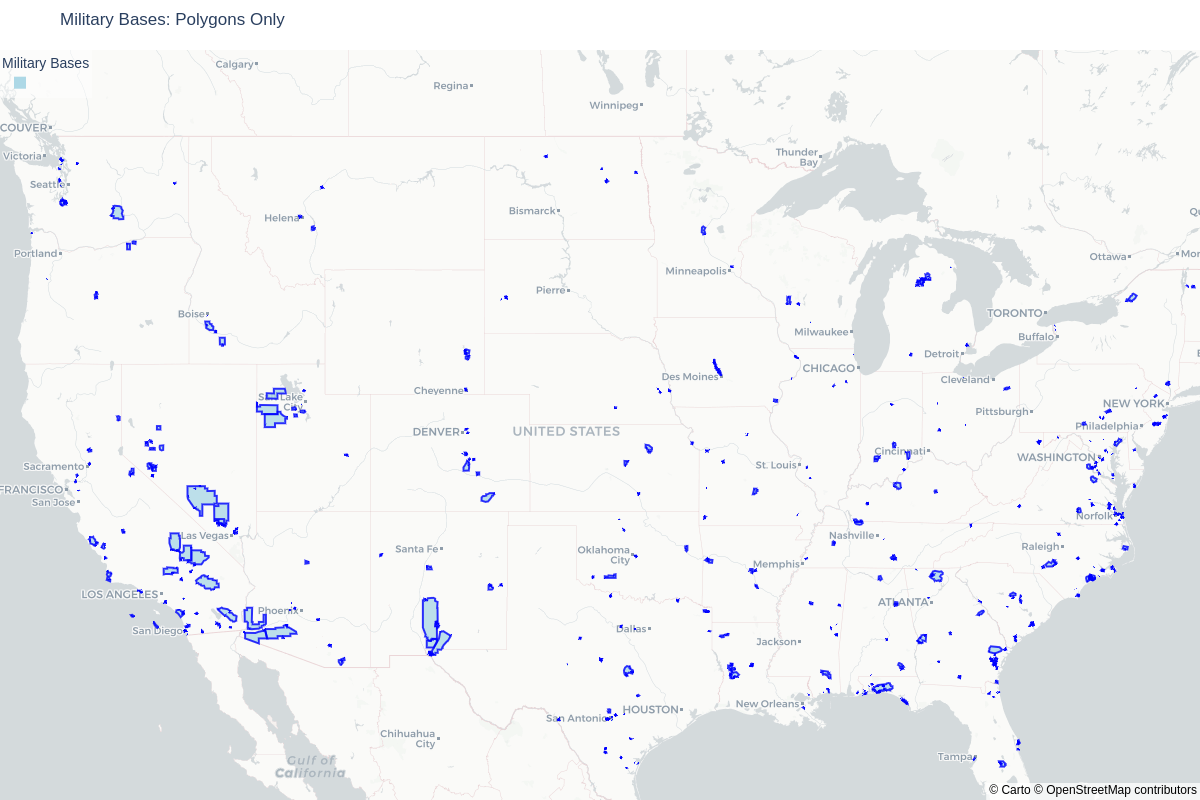

In [8]:
import plotly.express as px

# Create a DataFrame for mapping polygons; we use the index as the "id"
military_features_df = military_df.copy()
military_features_df['id'] = military_features_df.index

# Create the polygon layer using px.choropleth_mapbox.
fig = px.choropleth_mapbox(
    military_features_df,
    geojson=military_geojson,
    locations='id',
    color_discrete_sequence=["lightblue"],  # Use a uniform color for the polygons
    hover_name="Site Name",
    hover_data=["State Terr", "COUNTRY"],
    mapbox_style="carto-positron",
    zoom=4,
    opacity=0.8,
    title="Military Bases: Polygons Only",
    center={"lat": 39.97612496116258, "lon": -98.96677562915433},
    height=800,
    width=1200
)

# Update the polygon trace to add a blue outline for emphasis.
if fig.data:
    fig.data[0].update(marker_line_width=2, marker_line_color='blue')

# Update layout to remove extra margins so the map fills the entire plot area.
fig.update_layout(
    margin={"r": 0, "t": 50, "l": 0, "b": 0},
    legend=dict(
        title="Military Bases",
        x=0,
        y=1,
        bgcolor="rgba(255,255,255,0.5)"
    )
)

# Remove renderer="png" if you want a interactive plot instead
fig.show(renderer="png")